# Setup

In [1]:
using DifferentialEquations, DiffEqBayes, Plots, Turing, Interpolations

# Three node network

Based on lorenz example. Writing out the system of equations individually instead of looping through each node.

In [2]:
phi(a::Number) = (exp(2*a)-1)/(exp(2*a)+1)

phi (generic function with 1 method)

In [128]:
function additive_noise(du,u,p,t)
    s,g,W,I = p
    for i = 1:length(u)
        du[i] = 0 #no noise
#         du[i] = 1 #N(0, dt)
    end
end

function network_model(du,u,p,t)
    s,g,W,I = p
    for i=1:length(u)
        du[i] = -u[i] + s*phi(u[i]) + g*(sum(W[i,:].*u)) + I(t)
    end
end

network_model (generic function with 1 method)

In [124]:
num_nodes = 3
u0 = repeat([0.0], num_nodes)
Tmax = 100.0
tspan = (0,Tmax)

s = 0.3
g = 0.7
W = [0.0 0.2 0.0; 0.4 0.0 0.0; 0.0 0.3 0.0]

ts = 1:1:Tmax
task = repeat([0.0], 100)
task[4] = 1
I = LinearInterpolation(ts, task, extrapolation_bc = 0)
dt = 0.5

p = [s,g,W,I]

prob_sde = SDEProblem(network_model,additive_noise,u0,tspan,p)


SDEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: [0.0, 0.0, 0.0]

In [127]:
sol = solve(prob_sde)

retcode: Success
Interpolation: 1st order linear
t: 1013-element Array{Float64,1}:
   0.0
   1.0e-6
   2.125e-6
   3.3906250000000003e-6
   4.814453125e-6
   6.4162597656250006e-6
   8.218292236328125e-6
   1.0245578765869141e-5
   1.2526276111602784e-5
   1.5092060625553133e-5
   1.7978568203747277e-5
   2.1225889229215687e-5
   2.487912538286765e-5
   ⋮
  65.69594262942694
  67.43913441529688
  69.36132831647113
  71.50000253579582
  73.9049349838317
  76.61048398787207
  79.65422661741749
  83.07843707565608
  86.9306738411745
  91.26444020238272
  96.13992735874197
 100.0
u: 1013-element Array{Array{Float64,1},1}:
 [0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0]
 ⋮
 [0.008980885692302588, 0.008980885692302588, 0.008980885692302588]
 [0.007950277578114963, 0.007950277578114963, 0.007950277578114963]
 [0.0069506645

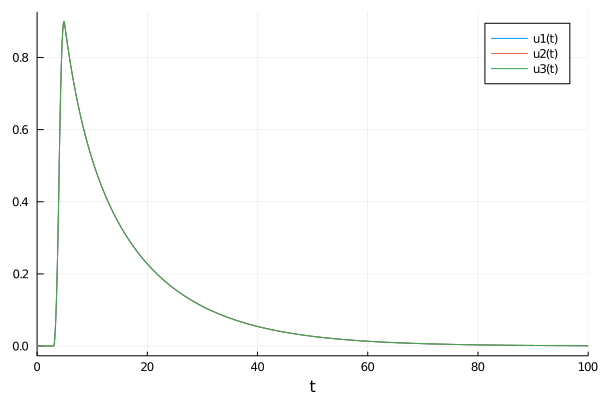

In [126]:
plot(sol)

In [136]:
W[1,:] .* u0

3-element Array{Float64,1}:
 0.0
 0.0
 0.0

In [135]:
u0

3-element Array{Float64,1}:
 0.0
 0.0
 0.0